## Sentiment Analysis on Movie Reviews 

In [2]:
!pip install spacy

## Read the Dataset

In [1]:
import pandas as pd


df = pd.read_csv(r"IMDB Dataset.csv", encoding= 'unicode_escape')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


##Since the dataset is pretty balanced there is no need to handle imbalance

## Preprocessing

##convert sentiments to numerical value

In [2]:
df['sentiment'].replace({'positive': 1, 'negative': 0}, inplace = True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


##Cleaning HTML tags from the dataset

In [3]:
import re
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text.lower())
clean_html("whg TRWhsiL>><br>> sioe")

'whg trwhsil>>> sioe'

##Applying the clean_html function

In [4]:
df['review_processed'] = df.review.apply(clean_html)
df.head()

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"petter mattei's ""love in the time of money"" is..."


##Removing special characters from the dataset

In [5]:
def remove_special(text):
    x = ''
    for i in text:
        if i.isalnum():
            x = x + i
        else:
            x = x + ' '
    return x
remove_special('whg trwhsil>>> sioe')

'whg trwhsil    sioe'

##Applying the remove_special function

In [6]:
df['review_processed'] = df.review_processed.apply(remove_special)
df.head()

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love in the time of money is...


##Download spacy

In [7]:
!python -m spacy download en

     -------------------------------------- 12.8/12.8 MB 396.0 kB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


##Removing stopwords and punctuations

In [9]:
import spacy 
nlp = spacy.load("en_core_web_sm")

def preprocessing(text):
    doc = nlp(text)
    
    filtered = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered.append(token.lemma_)
    
    return " ".join(filtered)
preprocessing('whg trwhsil is the best sioe')

'whg trwhsil good sioe'

##Applying the preprocessing function on the dataset

In [10]:
df['review_processed'] = df.review_processed.apply(preprocessing)
df.head()

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,1,reviewer mention watch 1 oz episode ll hook ...
1,A wonderful little production. <br /><br />The...,1,wonderful little production film technique u...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,0,basically s family little boy jake think s...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love time money visually s...


## Feature visualization

([<matplotlib.axis.XTick at 0x2203b4a6190>,
 [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

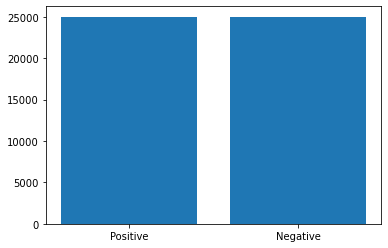

In [11]:
import numpy as np
import matplotlib.pyplot as plt

df1 = df[df['sentiment'] == 0].drop(['review','review_processed'], axis=1)
df2 = df[df['sentiment'] == 1].drop(['review','review_processed'], axis=1)
y1 = df1.value_counts()
y2 = df2.value_counts()

y = np.array([y1,y2])
y = y.flatten()

x = np.arange(2)
xlabels = ['Positive', 'Negative']
plt.bar(x, y)
plt.xticks(x, xlabels)

## Split the training and testing dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.review_processed,
    df.sentiment,
    test_size = 0.3,
    stratify = df.sentiment
)

In [13]:
print(X_train.shape)
X_train.head()

(35000,)


5388     witness wife   linda hoffman   engage sexual a...
27442    series brilliant   easily good horror film tim...
23775    battleship sink     survivor   hang nearby lif...
48201    short magnificent photography cinematography f...
3743     come away movie feeling well   instead grip   ...
Name: review_processed, dtype: object

## Train the Model

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn. metrics import classification_report

model = Pipeline([
    ('vectorizer_bigram', CountVectorizer(ngram_range = (1,3))),
    ('LogisticReg', LogisticRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\samri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7500
           1       0.88      0.91      0.89      7500

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

